## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [ ]:
import numpy as np

In [ ]:
x_train, x_test, y_train, y_test = np.load('classification_data_HW2.npy', allow_pickle=True)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [ ]:
## Your code HERE
m1 = np.array([[0.0] , [0.0]])
m2 = np.array([[0.0] , [0.0]])
n1 = 0.0
n2 = 0.0
for i , xys in enumerate(x_train):
  if y_train[i] == 0:
    n1 += 1
    m1[0][0] += xys[0]
    m1[1][0] += xys[1]
  else:
    n2 += 1
    m2[0][0] += xys[0]
    m2[1][0] += xys[1]
m1 /= n1 
m2 /= n2


In [ ]:
print(f"mean vector of class 1: {m1.reshape(2)} ", f"mean vector of class 2: {m2.reshape(2)}")

mean vector of class 1: [ 0.99253136 -0.99115481]  mean vector of class 2: [-0.9888012   1.00522778]


## 2. Compute the Within-class scatter matrix SW

In [ ]:
## Your code HERE
sw = np.zeros((2,2))
for i , xys in enumerate(x_train):
  col = np.array([[xys[0]] , [xys[1]]])
  if y_train[i] == 0:
    col = np.subtract(col , m1) #(2 , 1)
  else:
    col = np.subtract(col , m2) #(2 , 1)
  row = col.T #(1 , 2)
  final = np.dot(col , row)
  sw = np.add(sw , final)


#a = np.array([[1] , [2]])
# b = np.array([[3] , [4]])
# print(np.subtract(a , b))
# c = np.array([[3] , [4]])
# print(c.T)
# print(c.T.shape)

In [ ]:
print(f"Within-class scatter matrix SW: {sw.reshape(2,2)}")

Within-class scatter matrix SW: [[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3.  Compute the Between-class scatter matrix SB

In [ ]:
## Your code HERE
sb = np.zeros((2,2))
col = np.subtract(m2 , m1) #(2 , 1)
row = col.T #(1 , 2)
sb = np.dot(col , row)

In [ ]:
print(f"Between-class scatter matrix SB: {sb.reshape(2,2)}")

Between-class scatter matrix SB: [[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [ ]:
## Your code HERE
sw_inverse = np.linalg.inv(sw)
w = np.dot(sw_inverse , np.subtract(m2 , m1))
# w = np.array([[6] , [8]])
w = w/np.sqrt(np.sum(w**2)) #normalize to norm equal to 1

In [ ]:
print(f" Fisher’s linear discriminant: {w.reshape(2)}")

 Fisher’s linear discriminant: [-0.37003809  0.92901658]


## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [ ]:
from sklearn.metrics import accuracy_score
from random import randint

def FindKNN(k , project_val): #KNN
  absplusinfo = []
  for i , info in enumerate(projected_train):
    val = info[0]
    id = info[1]
    absplusinfo.append((abs(val - project_val) , id))
  absplusinfo.sort(key=lambda x: x[0])
  class1 = 0
  class2 = 0
  for i in range(k):
    if y_train[absplusinfo[i][1]]:
      class2+=1
    else :
      class1+=1
  if class1 > class2:
    return 0
  elif class1 < class2:
    return 1
  else:
    return randint(0, 1)


projected_train = []

for i , xys in enumerate(x_train):
  project = xys[0]*w[0][0] + xys[1]*w[1][0]
  projected_train.append((project , i))

for k in range(1 , 6):
  y_pred = []
  for i , xys in enumerate(x_test):
    project = xys[0]*w[0][0] + xys[1]*w[1][0]
    class_ = FindKNN(k , project)
    y_pred.append(class_)
  y_pred = np.array(y_pred)
  acc = accuracy_score(y_test, y_pred)
  print(f"Accuracy of test-set {acc} when k = {k}")

Accuracy of test-set 0.8488 when k = 1
Accuracy of test-set 0.8488 when k = 2
Accuracy of test-set 0.8792 when k = 3
Accuracy of test-set 0.8744 when k = 4
Accuracy of test-set 0.8912 when k = 5


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

[]

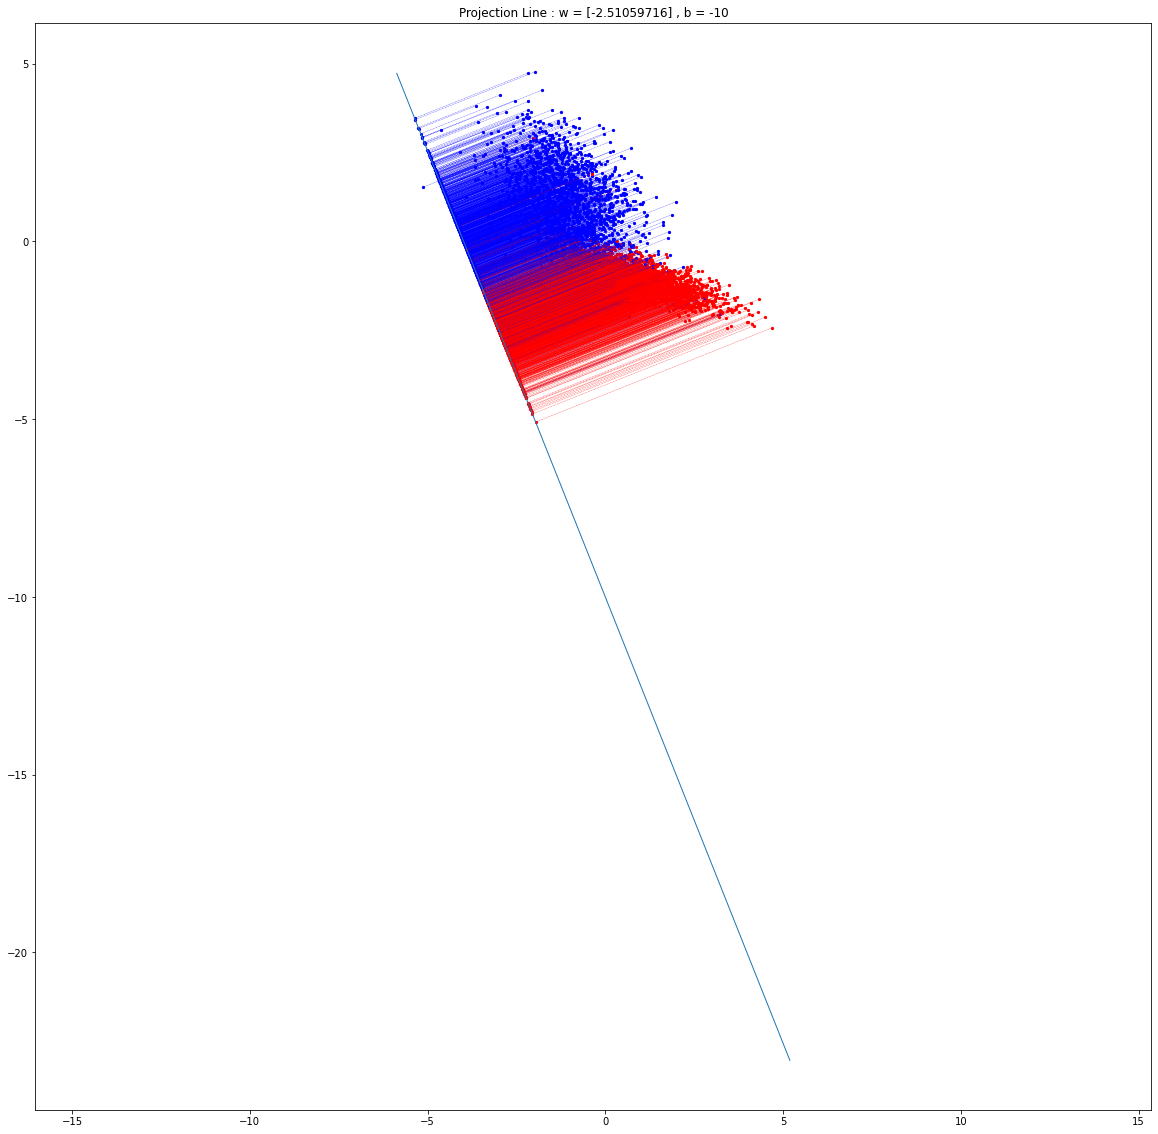

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

b = -10

figure(figsize=(20, 20))

def abline(slope, intercept): #draw a line given its slope and intercept
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-' , linewidth = 1)

def compute_project(x , y , slope , intercept): #compute projection point
  #   y = slope * x + intercept
  #==> -slope * x + y - intercept = 0
  a = -slope*1.0
  b = 1.0
  c = -intercept*1.0
  #==> ax + by + c -> impute
  impute = a * x + b * y + c
  xx = x-a*impute/(a**2+b**2)
  yy = y-b*impute/(a**2+b**2)
  return (xx , yy)

for i , xys in enumerate(x_train):
  # if i > 0:
  #   break
  pt = compute_project(xys[0] , xys[1] , w[1][0]/w[0][0] , b)
  if y_train[i] == 0:   
    plt.scatter(xys[0] , xys[1] , color = "red" , s = 5)
    plt.scatter(pt[0] ,pt[1] , color = "red" , s = 5)
    plt.plot([xys[0] , pt[0]] , [xys[1] , pt[1]] , '--' , color = 'red' , linewidth = 0.3)
  else:
    plt.scatter(xys[0] , xys[1] , color = "blue" , s = 5)
    plt.scatter(pt[0] ,pt[1] , color = "blue" , s = 5)
    plt.plot([xys[0] , pt[0]] , [xys[1] , pt[1]] , '--' , color = 'blue' , linewidth = 0.3)

abline(w[1][0]/w[0][0] , b)
plt.axis('equal')
plt.title(f"Projection Line : w = {w[1]/w[0]} , b = {b}")
plt.plot()